* Nama : Safira Alya Fafaza
* Kode Peserta : PYTN-KS14-017

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import math
import statistics
import scipy.stats 

# Data Collection

## Import Data

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Data Understanding

## Jumlah Data

In [3]:
df.shape

(84548, 22)

Dapat diketahui bahwa jumlah data pada dataset NYC Rolling Sales adalah 84,548

## Informasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Dataset ini berisi sebagai berikut :
* BOROUGH -> Kode digit untuk wilayah tempat properti berada dimana (1) Manhattan, (2) Bronx, (3) Brooklyn, (4) Queens, dan (5) Staten Island
* NEIGHBORHOOD
* BUILDING CLASS CATEGORY
* TAX CLASS AT PRESENT
* BLOCK -> Kombinasi wilayah, blok, dan lot yang membentuk kunci unik untuk properti di NYC, biasa disebut BBL
* LOT -> Kombinasi wilayah, blok, dan lot yang membentuk kunci unik untuk properti di NYC, biasa disebut BBL
* EASE-MENT
* BUILDING CLASS AT PRESENT -> Jenis bangunan pada berbagai titik waktu
* ADDRESS
* APARTMENT NUMBER
* ZIP CODE
* RESIDENTAL UNITS
* COMMERCIAL UNITS
* TOTAL UNITS
* LAND SQUARE FEET
* GROSS SQUARE FEER
* YEAR BUILT
* TAX CLASS AT TIME OF SALE
* BUILDING CLASS AT TIME OF SALE -> Jenis bangunan pada berbagai titik waktu
* SALE PRICE
* SALE DATE -> Dengan rentang waktu September 2016 sampai September 2017

## Rangkuman dan Sebaran Data

In [5]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


## Menampilkan 10 Data Teratas

In [6]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Menampilkan 10 Data Terbawah

In [7]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


## Kategori Borough

In [8]:
pd.DataFrame(df['BOROUGH'].unique())

,0
0,1
1,2
2,3
3,4
4,5


Dengan kode wilayah sebagai berikut :
1. Manhattan
2. Bronx
3. Brooklyn
4. Queens
5. Staten Island

## Kategori Neighbourhood

In [9]:
pd.DataFrame(df['NEIGHBORHOOD'].unique())

,0
0,ALPHABET CITY
1,CHELSEA
2,CHINATOWN
3,CIVIC CENTER
4,CLINTON
...,...
249,TRAVIS
250,WEST NEW BRIGHTON
251,WESTERLEIGH
252,WILLOWBROOK


## Kategori Building Class

In [10]:
pd.DataFrame(df['BUILDING CLASS CATEGORY'].unique())

,0
0,07 RENTALS - WALKUP APARTMENTS
1,08 RENTALS - ELEVATOR APARTMENTS
2,09 COOPS - WALKUP APARTMENTS
3,10 COOPS - ELEVATOR APARTMENTS
4,11A CONDO-RENTALS
5,12 CONDOS - WALKUP APARTMENTS
6,13 CONDOS - ELEVATOR APARTMENTS
7,14 RENTALS - 4-10 UNIT
8,15 CONDOS - 2-10 UNIT RESIDENTIAL
9,16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT


## Kategori Tax Class at Present

In [11]:
pd.DataFrame(df['TAX CLASS AT PRESENT'].unique())

,0
0,2A
1,2
2,2B
3,2C
4,
5,4
6,1
7,1C
8,3
9,1A


## Kategori Building Class at Present

In [12]:
pd.DataFrame(df['BUILDING CLASS AT PRESENT'].unique())

,0
0,C2
1,C7
2,C4
3,D5
4,D9
...,...
162,A0
163,H4
164,J1
165,CM


## Kategori Tax Class at Time of Sale

In [13]:
pd.DataFrame(df['TAX CLASS AT TIME OF SALE'].unique())

,0
0,2
1,4
2,1
3,3


## Kategori Building Class at Time of Sale

In [14]:
pd.DataFrame(df['BUILDING CLASS AT TIME OF SALE'].unique())

,0
0,C2
1,C7
2,C4
3,D5
4,D9
...,...
161,P6
162,A0
163,J1
164,CM


## Rentang Tahun Dibuatnya Properti

In [15]:
df['YEAR BUILT'].unique()

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973,
       2011, 1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921,
       2010, 1954, 1111, 1924, 1990, 1890, 1991, 1988, 1895, 2016, 1957,
       1986, 1966, 1998, 1870, 1923, 1969, 2017, 1968, 1934, 1956, 1982,
       1914, 1903, 1967, 1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959,
       1962, 1945, 1972, 1976, 1916, 1880, 1970, 1846, 1941, 1952, 1896,
       1985, 1981, 1888, 1947, 1975, 1974, 2002, 1994, 1892, 1894, 1891,
       1996, 1997, 1949, 1999, 1800, 1979, 1971, 1977, 1942, 1978, 1826,
       1881, 1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847,
       1829, 1844, 1835, 1852, 1856, 1854, 1832, 18

Dapat diketahui bahwa rentang YEAR BUILT dimulai dari tahun 0-2017

# Data Cleansing

In [16]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


## Cek Data Kosong

In [17]:
df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Dapat diketahui tidak ada data yang kosong atau NaN

## Cek Data Duplikat

In [18]:
df.duplicated().sum()

0

Dapat diketahui bahwa tidak ada data yang duplikat

# Data Preparation

In [19]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


## Menghapus Kolom yang Tidak Diperlukan

In [20]:
df.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Kolom Unnamed: 0, EAST-MENT, APPARTMENT NUMBER dihapus karena tidak mengandung data yang dibutuhkan dalam proses pengolahan data

## Mengubah Isi Data

In [21]:
df['BOROUGH'] = df.BOROUGH.replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4.: 'Queens', 5: 'Staten Island'})
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Pengubahan isi data dilakukan karena menyesuaikan isi data yang berupa kategorikal sehingga memudahkan dalam proses pengolahan data

## Mengubah Tipe Data

### to Category

In [22]:
to_category = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for column in to_category:
    df[column] = df[column].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT       84548 non-null  category
 7   ADDRESS                         84548 non-null  object  
 8   ZIP CODE                        84548 non-null  int64   
 9   RESIDENTIAL UNITS               84548 non-null  int64   
 10  COMMERCIAL UNITS                84548 non-null  int64   
 11  TOTAL UNITS                     84548 non-null  int64   
 12  LAND SQUARE FEET  

### to Integer

In [23]:
to_integer = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for column in to_integer:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT       84548 non-null  category
 7   ADDRESS                         84548 non-null  object  
 8   ZIP CODE                        84548 non-null  int64   
 9   RESIDENTIAL UNITS               84548 non-null  int64   
 10  COMMERCIAL UNITS                84548 non-null  int64   
 11  TOTAL UNITS                     84548 non-null  int64   
 12  LAND SQUARE FEET  

### to TimeStamp

In [24]:
to_timestamp = ['SALE DATE']
for column in to_timestamp:
    df[column] = pd.to_datetime(df[column])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [25]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


## Penanganan Data Kosong 

In [26]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Dapat diketahui bahwa dalam dataset semua kolom tidak ada nilai yang kosong kecuali pada kolom LAND SQUARE FEET dengan 26252 missing value, kolom GROSS SQUARE FEET dengan 27612 missing value dan kolom SALE PRICE dengan 14561 missing value

In [27]:
x_landsf = df['LAND SQUARE FEET'].mean()
x_grosssf = df['GROSS SQUARE FEET'].mean()
x_sale_price = df['SALE PRICE'].mean()

print('Mean Land Square Feet : ', x_landsf)
print('Mean Gross Square Feet : ', x_grosssf)
print('Mean Sale Price : ', x_sale_price)

Mean Land Square Feet :  3941.675775353369
Mean Gross Square Feet :  4045.707478572432
Mean Sale Price :  1276456.4977638705


In [28]:
df['LAND SQUARE FEET'].fillna(x_landsf, inplace=True)
df['GROSS SQUARE FEET'].fillna(x_grosssf, inplace=True)
df['SALE PRICE'].fillna(x_sale_price, inplace=True)

df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [29]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,4.500000e+05,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,5.500000e+05,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,4.600000e+05,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,1.169334e+07,2016-12-21


Karena kolom LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE merupakan numerikal, maka missing value diisi dengan nilai rata-rata atau mean

## Penanganan Data Duplikat

In [30]:
df.duplicated().sum()

765

In [31]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Diketahui terdapat 765 data yang duplikat, karena data duplikat tidak lebih dari 10% sehingga tidak mengganggu proses pengolahan data maka data duplikat dapat dihapus

In [32]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,4.500000e+05,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,5.500000e+05,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,4.600000e+05,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,1.169334e+07,2016-12-21


## Penanganan Kolom YEAR BUILT == 0

In [33]:
df['YEAR BUILT'] = df['YEAR BUILT'].replace(0, df['YEAR BUILT'].median())

df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,4.500000e+05,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,5.500000e+05,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,4.600000e+05,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,1.169334e+07,2016-12-21


In [34]:
df['YEAR BUILT'].unique()

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005, 1989, 2014, 2008, 1965, 2013,
       2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911, 1983,
       1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958, 1904,
       1907, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973, 2011,
       1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921, 2010,
       1954, 1111, 1924, 1990, 1890, 1991, 1988, 1895, 2016, 1957, 1986,
       1966, 1998, 1870, 1923, 1969, 2017, 1968, 1934, 1956, 1982, 1914,
       1903, 1967, 1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959, 1962,
       1945, 1972, 1976, 1916, 1880, 1970, 1846, 1941, 1952, 1896, 1985,
       1981, 1888, 1947, 1975, 1974, 2002, 1994, 1892, 1894, 1891, 1996,
       1997, 1949, 1999, 1800, 1979, 1971, 1977, 1942, 1978, 1826, 1881,
       1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847, 1829,
       1844, 1835, 1852, 1856, 1854, 1832, 1845, 18

Dapat diketahui dari kolom YEAR BUILT sudah tidak ada lagi tahun yang dimulai dari 0

# Hipotesis

Apakah ada perbedaan unit yang terjual antara properti yang dibangun 2013-2017 dengan yang dibangun tahun 2000-2004?

# Hasil

## Jumlah

**JUMLAH PROPERTI YANG DIBANGUN TAHUN 2000-2004**

In [35]:
df_00_04 = df[(df['YEAR BUILT'] == 2000) | (df['YEAR BUILT'] == 2001) | (df['YEAR BUILT'] == 2002) | (df['YEAR BUILT'] == 2003) | (df['YEAR BUILT'] == 2004)]
df_00_04

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
176,Manhattan,ALPHABET CITY,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,372,1003,R1,296 EAST 2ND STREET,10009,1,0,1,3941.675775,4045.707479,2003,2,R1,8.050000e+05,2016-09-06
177,Manhattan,ALPHABET CITY,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,372,1004,R1,296 EAST 2ND STREET,10009,1,0,1,3941.675775,4045.707479,2003,2,R1,7.350000e+05,2016-11-28
178,Manhattan,ALPHABET CITY,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,375,1105,R1,753 EAST 5TH STREET,10009,1,0,1,3941.675775,4045.707479,2003,2,R1,8.100000e+05,2016-11-14
179,Manhattan,ALPHABET CITY,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,375,1110,R1,753 EAST 5TH STREET,10009,1,0,1,3941.675775,4045.707479,2003,2,R1,1.276456e+06,2016-12-07
324,Manhattan,CHELSEA,10 COOPS - ELEVATOR APARTMENTS,2,694,42,D4,"520 WEST 23RD STREET, 16C",10011,0,0,0,3941.675775,4045.707479,2003,2,D4,7.325000e+05,2016-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84521,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7020,408,B2,56 DEXTER AVENUE,10309,2,0,2,8306.000000,2600.000000,2001,1,B2,7.725000e+05,2017-03-30
84522,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7020,423,B2,35 LYNBROOK AVENUE,10309,2,0,2,5060.000000,2600.000000,2001,1,B2,7.400000e+05,2017-01-04
84523,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,10,B9,27 CLAY PIT ROAD,10309,2,0,2,3288.000000,1916.000000,2000,1,B9,1.276456e+06,2017-03-17
84528,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7092,140,B9,10 TRINA LANE,10309,2,0,2,3936.000000,1470.000000,2004,1,B9,5.500000e+05,2017-06-20


In [65]:
df_00_04['TOTAL UNITS'].sum()

3580

Diketahui terdapat 3580 properti yang terjual yang dibangun antara tahun 2000-2004

**JUMLAH PROPERTI YANG DIBANGUN TAHUN 2013-2017**

In [37]:
df_13_17 = df[(df['YEAR BUILT'] == 2013) | (df['YEAR BUILT'] == 2014) | (df['YEAR BUILT'] == 2015) | (df['YEAR BUILT'] == 2016) | (df['YEAR BUILT'] == 2017)]
df_13_17 = df_13_17.sort_values('YEAR BUILT')
df_13_17

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
44996,Brooklyn,PARK SLOPE,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,958,1308,R1,563 CARROLL STREET,11215,1,0,1,0.0,0.000000,2013,2,R1,1.425550e+06,2017-03-08
29638,Brooklyn,BOROUGH PARK,04 TAX CLASS 1 CONDOS,1C,5510,1401,R6,1615 60TH STREET,11204,1,0,1,0.0,0.000000,2013,1,R6,0.000000e+00,2016-11-07
29635,Brooklyn,BOROUGH PARK,04 TAX CLASS 1 CONDOS,1C,5498,1203,R6,5716 18TH AVENUE,11204,1,0,1,0.0,0.000000,2013,1,R6,5.070000e+05,2017-06-20
29634,Brooklyn,BOROUGH PARK,04 TAX CLASS 1 CONDOS,1C,5498,1202,R6,5716 18TH AVENUE,11204,1,0,1,0.0,0.000000,2013,1,R6,4.990000e+05,2017-04-05
29633,Brooklyn,BOROUGH PARK,04 TAX CLASS 1 CONDOS,1C,5498,1201,R6,5716 18TH AVENUE,11204,1,0,1,0.0,0.000000,2013,1,R6,5.500000e+05,2017-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73696,Queens,SPRINGFIELD GARDENS,02 TWO FAMILY DWELLINGS,1,12281,35,B3,156-19 134TH AVENUE,11434,2,0,2,4235.0,1387.000000,2017,1,B3,8.700000e+05,2017-07-28
2073,Manhattan,FASHION,31 COMMERCIAL VACANT LAND,4,762,67,H1,350 WEST 39TH STREET,10018,0,422,422,12344.0,4045.707479,2017,4,V1,1.276456e+06,2016-09-16
21715,Bronx,MOTT HAVEN/PORT MORRIS,07 RENTALS - WALKUP APARTMENTS,2,2292,28,C7,432 E.148TH ST,10455,10,1,11,2500.0,0.000000,2017,2,C7,0.000000e+00,2017-07-21
2065,Manhattan,FASHION,25 LUXURY HOTELS,4,762,67,H1,350 WEST 39TH STREET,10018,0,422,422,12344.0,4045.707479,2017,4,H1,1.276456e+06,2017-03-06


In [66]:
df_13_17['TOTAL UNITS'].sum()

13325

Diketahui terdapat 13325 properti yang terjual yang dibangun antara tahun 2013-2017

## Mean

**RATA-RATA HARGA JUAL PROPERTI YANG DIBANGUN TAHUN 2000-2004**

In [39]:
df_00_04['SALE PRICE'].mean()

981112.4426375398

Diketahui bahwa rata-rata harga jual properti yang dibangun tahun 2000-2004 adalah sebesar 981112.44

**RATA-RATA HARGA JUAL PROPERTI YANG DIBANGUN TAHUN 2013-2017**

In [40]:
df_13_17['SALE PRICE'].mean()

1812543.7502931345

Diketahui bahwa rata-rata harga jual properti yang dibangun tahun 2013-2017 adalah sebesar 1812543.75

## Median

**NILAI TENGAH BLOK DARI PROPERTI YANG DIBANGUN TAHUN 2000-2004**

In [41]:
df_00_04['BLOCK'].median()

3075.0

Diketahui nilai tengah blok dari properti yang dibangun tahun 2000-2004 adalah 3075

**NILAI TENGAH BLOK DARI PROPERTI YANG DIBANGUN TAHUN 2013-2014**

In [42]:
df_13_17['BLOCK'].median()

2245.0

Diketahui nilai tengah blok dari  properti yang dibangun tahun 2013-2017 adalah 2245

## Modus

**TAHUN PROPERTI YANG SERING TERJUAL DALAM RENTANG 2000-2004**

In [43]:
df_00_04['YEAR BUILT'].mode()

0    2004
Name: YEAR BUILT, dtype: int64

Diketahui bahwa properti yang dibangun tahun 2000 lebih banyak terjual dalam rentang 2000-2004

**TAHUN PROPERTI YANG SERING TERJUAL DALAM RENTANG 2013-2017**

In [44]:
df_13_17['YEAR BUILT'].mode()

0    2015
Name: YEAR BUILT, dtype: int64

Diketahui bahwa properti yang dibangun tahun 2015 lebih banyak terjual dalam rentang 2000-2004

## Range

**RENTANG LUAS TANAH DARI PROPERTI YANG DIBANGUN TAHUN 2000-2004**

In [45]:
range_00_04 = np.ptp(df_00_04['LAND SQUARE FEET'])
range_00_04

208033.0

Diketahui bahwa rentang luas tanah dari properti yang dibangun tahun 2000-2004 adalah 208033

**RENTANG LUAS TANAH DARI PROPERTI YANG DIBANGUN TAHUN 2013-2017**

In [46]:
range_13_14 = np.ptp(df_13_17['LAND SQUARE FEET'])
range_13_14

499600.0

Diketahui bahwa rentang luas tanah dari properti yang dibangun tahun 2013-2017 adalah 499600

## Variance

**PENYEBARAN DATA LUAS TANAH DARI PROPERTI YANG DIBANGUN TAHUN 2000-2004**

In [47]:
var_00_04 = df_00_04['LAND SQUARE FEET'].var()
var_00_04

31569773.43544927

Diketahui penyebaran data luas tanah dari properti yang dibangun tahun 2000-2004 adalah 31569773.43

**PENYEBARAN DATA LUAS TANAH DARI PROPERTI YANG DIBANGUN TAHUN 2013-2014**

In [48]:
var_13_17 = df_13_17['LAND SQUARE FEET'].var()
var_13_17

73358507.97444291

Diketahui penyebaran data luas tanah dari properti yang dibangun tahun 2013-2014 adalah 73358507.97

## Standar Deviasi

**STANDAR DEVIASI DATA LUAS TANAH DARI PROPERTI YANG DIBANGUN TAHUN 2000-2004**

In [49]:
std_00_04 = df_00_04['LAND SQUARE FEET'].std()
std_00_04

5618.698553530815

Diketahui penyebaran data luas tanah dari properti yang dibangun tahun 2000-2004 adalah 5618.69

**STANDAR DEVIASI DATA LUAS TANAH DARI PROPERTI YANG DIBANGUN TAHUN 2013-2017**

In [50]:
std_13_17 = df_13_17['LAND SQUARE FEET'].std()
std_13_17

8564.958142013475

Diketahui penyebaran data luas tanah dari properti yang dibangun tahun 2000-2004 adalah 8564.95

## Probability Distribution

**UNIFORM DISTRIBUTION BERDASARKAN TOTAL UNIT PROPERTI PADA RENTANG TAHUN 2000-2004**

In [51]:
size_totalunits_00_04 = df_00_04['TOTAL UNITS'].shape
mean_totalunits_00_04 = df_00_04['TOTAL UNITS'].mean()
std_totalunits_00_04 = df_00_04['TOTAL UNITS'].std()

print('Size total unit properti pada rentang tahun 2000-2004 : ', size_totalunits_00_04)
print('Rata-rata total unit properti pada rentang tahun 2000-2004 : ', mean_totalunits_00_04)
print('Standar deviasi total unit properti pada rentang tahun 2000-2004 : ', std_totalunits_00_04)

Size total unit properti pada rentang tahun 2000-2004 :  (2126,)
Rata-rata total unit properti pada rentang tahun 2000-2004 :  1.6839134524929444
Standar deviasi total unit properti pada rentang tahun 2000-2004 :  3.778925452003445


C:\Users\sapphire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


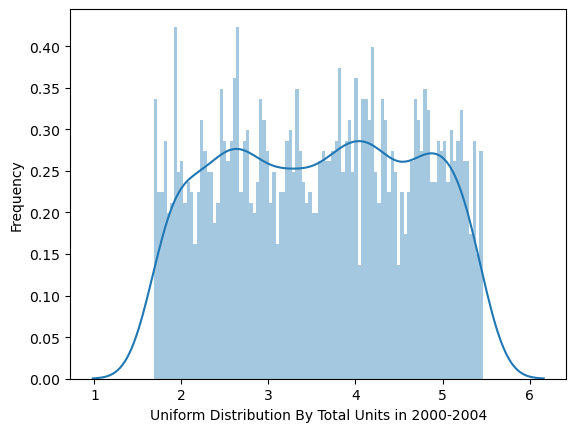

In [52]:
from scipy.stats import uniform
dist_uniform = uniform.rvs(size=size_totalunits_00_04, loc=mean_totalunits_00_04, scale=std_totalunits_00_04)  
sns.distplot(dist_uniform, bins=100)  
plt.xlabel('Uniform Distribution By Total Units in 2000-2004') 
plt.ylabel('Frequency')  
plt.show()

**NORMAL DISTRIBUTION BERDASARKAN TOTAL UNIT PROPERTI PADA RENTANG TAHUN 2013-2017**

In [53]:
size_totalunits_13_17 = df_13_17['TOTAL UNITS'].shape
mean_totalunits_13_17 = df_13_17['TOTAL UNITS'].mean()
std_totalunits_13_17 = df_13_17['TOTAL UNITS'].std()

print('Size total unit properti pada rentang tahun 2013-2017 : ', size_totalunits_13_17)
print('Rata-rata total unit properti pada rentang tahun 2013-2017 : ', mean_totalunits_13_17)
print('Standar deviasi total unit properti pada rentang tahun 2013-2017 : ', std_totalunits_13_17)

Size total unit properti pada rentang tahun 2013-2017 :  (4235,)
Rata-rata total unit properti pada rentang tahun 2013-2017 :  3.146399055489965
Standar deviasi total unit properti pada rentang tahun 2013-2017 :  21.71024473924849


C:\Users\sapphire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


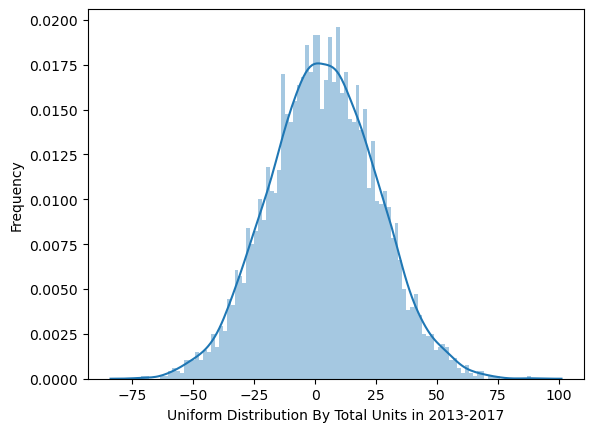

In [54]:
from scipy.stats import norm
dist_normal = norm.rvs(size=size_totalunits_13_17, loc=mean_totalunits_13_17, scale=std_totalunits_13_17)  
sns.distplot(dist_normal, bins=100)  
plt.xlabel('Uniform Distribution By Total Units in 2013-2017') 
plt.ylabel('Frequency')  
plt.show()

## Confident Interval

**CONFIDENT INTERVAL DARI RATA-RATA HARGA JUAL PROPERTI TAHUN 2004**

In [55]:
ci_00_04 = df_00_04.groupby('YEAR BUILT').agg({"SALE PRICE": [np.mean, np.std, np.size]})
ci_00_04

SALE PRICE                   
                    mean           std size
YEAR BUILT                                 
2000        1.127144e+06  2.871842e+06  225
2001        8.966220e+05  1.267779e+06  265
2002        1.092506e+06  1.250427e+06  511
2003        8.311693e+05  9.598101e+05  416
2004        9.740420e+05  1.794498e+06  709

In [56]:
n = 709
z = 1.96 #berdasarkan tabel z
mean_04 = 9.740420e+05
std_04 = 1.794498e+06
se_04 = z*np.sqrt(n)

lci_04 = mean_04 - se_04
uci_04 = mean_04 + se_04

print('lower confidence interval for 2004 : ', lci_04)
print('upper confidence interval for 2004 : ', uci_04)

lower confidence interval for 2004 :  973989.8109743337
upper confidence interval for 2004 :  974094.1890256663


Diketahui confidence interval rata-rata penjualan untuk tahun 2004 adalah 973989.81 dan 974094.18

**CONFIDENT INTERVAL DARI RATA-RATA HARGA JUAL PROPERTI TAHUN 2015**

In [57]:
ci_13_17 = df_13_17.groupby('YEAR BUILT').agg({"SALE PRICE": [np.mean, np.std, np.size]})
ci_13_17

SALE PRICE                    
                    mean           std  size
YEAR BUILT                                  
2013        2.881720e+06  5.704771e+06   742
2014        2.204314e+06  7.174414e+06  1230
2015        1.453430e+06  4.836858e+06  1465
2016        8.761137e+05  1.334928e+06   792
2017        5.704855e+05  6.423177e+05     6

In [58]:
n = 1465
z = 1.96 #berdasarkan tabel z
mean_15 = 1.453430e+06
std_15 = 4.836858e+06
se_15 = z*np.sqrt(n)

lci_15 = mean_15 - se_15
uci_15 = mean_15 + se_15

print('lower confidence interval for 2004 : ', lci_15)
print('upper confidence interval for 2004 : ', uci_15)

lower confidence interval for 2004 :  1453354.9803759006
upper confidence interval for 2004 :  1453505.0196240994


Diketahui confidence interval rata-rata penjualan untuk tahun 2015 adalah 1453354.98 dan 1453505.01

## Hypothesis Testing

Berdasarkan data NYC Penjualan Properti, apakah properti yang dibangun pada rentang tahun 2013-2017 tidak sama dengan properti yang dibangun tahun 2000-2004?

Populasi : data pada tahun 2000-2004 dan 2013-2017

Parameter of interest : total unit

Null hipotesis : rata-rata total unit 2000-2004 = rata-rata total unit 2013-2017

Alternatif hipotesis : rata-rata total unit 2000-2004 ≠ rata-rata total unit 2013-2017

Nilai alpha = 5% atau 0.05 (berdasarkan konvensi, nilai alpha yang biasa digunakan adalah sebesar 0.05)

Data Tahun 2000-2004 :

In [59]:
size_totalunits_00_04 = df_00_04['TOTAL UNITS'].shape
mean_totalunits_00_04 = df_00_04['TOTAL UNITS'].mean()
std_totalunits_00_04 = df_00_04['TOTAL UNITS'].std()

print('Size total unit properti pada rentang tahun 2000-2004 : ', size_totalunits_00_04)
print('Rata-rata total unit properti pada rentang tahun 2000-2004 : ', mean_totalunits_00_04)
print('Standar deviasi total unit properti pada rentang tahun 2000-2004 : ', std_totalunits_00_04)

Size total unit properti pada rentang tahun 2000-2004 :  (2126,)
Rata-rata total unit properti pada rentang tahun 2000-2004 :  1.6839134524929444
Standar deviasi total unit properti pada rentang tahun 2000-2004 :  3.778925452003445


Data Tahun 2013-2017 : 

In [60]:
size_totalunits_13_17 = df_13_17['TOTAL UNITS'].shape
mean_totalunits_13_17 = df_13_17['TOTAL UNITS'].mean()
std_totalunits_13_17 = df_13_17['TOTAL UNITS'].std()

print('Size total unit properti pada rentang tahun 2013-2017 : ', size_totalunits_13_17)
print('Rata-rata total unit properti pada rentang tahun 2013-2017 : ', mean_totalunits_13_17)
print('Standar deviasi total unit properti pada rentang tahun 2013-2017 : ', std_totalunits_13_17)

Size total unit properti pada rentang tahun 2013-2017 :  (4235,)
Rata-rata total unit properti pada rentang tahun 2013-2017 :  3.146399055489965
Standar deviasi total unit properti pada rentang tahun 2013-2017 :  21.71024473924849


In [68]:
sm.stats.ztest(df_13_17['TOTAL UNITS'].dropna(), df_00_04['TOTAL UNITS'].dropna(), alternative='two-sided')

(3.082580418459594, 0.0020521427414788014)

Diketahui bahwa p-value sebesar 0.0020521427414788014 lebih rendah dari nilai alpha yang sudah ditentukan yaitu 0.05 sehingga nilai null hipotesis dapat direject. Artinya, terdapat perbedaan yang signifikan dalam penjualan properti yang dibangun tahun 2013-2017 dengan properti yang dibangun tahun 2000-2004. Yaitu properti yang dibangun tahun 2013-2017 memiliki total penjualan yang lebih banyak dibanding properti yang dibangun tahun 2000-2004.

Penggunaan alternative='two-sided' dalam z-test untuk memeriksa ketidaksamaan.